In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from arabic_reshaper import reshape
from bidi.algorithm import get_display

Reading the data

In [2]:
def data_loader(filpath='movie.csv'):
    df=pd.read_csv(filpath)
    return df

Cleaning data and convert columns from object to numeric for Score and Voted 

In [3]:
def data_preprossing(df):
    #drop misising rows
    df=df.dropna().reset_index(drop=True)
    #drop Image column
    df=df.drop(columns=['Image'],axis=1)
    #converting columns
    df['Score']=pd.to_numeric(df['Score'],errors='coerce')
    df['Voted']=pd.to_numeric(df['Voted'],errors='coerce')

    return df

    

load and clean data

In [16]:
df=data_loader()
df=data_preprossing(df)

In [6]:
df.head(5)

,Name,Actors,Score,About,Genre,Crew,Voted,Type
0,یکی از میان همه,"[' سروش صحت', ' رامین راستاد', ' آزاده صمدی', ...",0.69,نیلوفر و نرگس بدون اطلاع همسرانشان مجبور به سف...,"['اکشن', 'هیجان انگیز']",[' ابراهیم شیبانی'],280.0,فیلم
1,جاده جنایت,"[' لعیا زنگنه', ' کاوه آرمیده', ' حشمت الله آر...",0.76,وقتی کتایون نگرانی و اضطراب بیش از حد شوهرش – ...,"['اکشن', 'هیجان انگیز']","[' جهانبخش ایمانی', ' ذبیح الله رحمانی', ' آرز...",530.0,فیلم
2,ساوالان,"[' مجید مظفری', ' محمد برسوزیان', ' فردوس کاوی...",0.90,روستای ساوالان هرسال توسط گروهی راهزن غارت می ...,"['اکشن', 'ماجراجویی']","[' یدالله صمدی', ' سیفعلی سیدکوثری نژاد', ' ید...",493.0,فیلم
3,پوزه چرمی,"[' ندا مقصودی', ' وحید جباری']",0.68,مردی برای رسیدن به اهدافش با پس انداز همسرش دس...,"['فیلم تئاتر', 'خانوادگی']","[' محمدعلی زمانی', ' هلموت کراوزر', ' محمد مهد...",182.0,فیلم
4,شکلاتی,"[' شبنم مقدمی', ' ناصر هاشمی', ' محمدرضا هدایت...",0.90,فیلم شکلاتی درباره این فیلم درباره کارخانه شکل...,"['خانوادگی', 'کمدی']","[' سهیل موفق', ' کریم خودسیانی', ' ایرج محمدی']",18330.0,فیلم


Finding the movie with maximum score

In [7]:
df[df['Score']==df['Score'].max().item()]

,Name,Actors,Score,About,Genre,Crew,Voted,Type
282,از کرخه تا راین,"[' هما روستا', ' علی دهکردی', ' صادق صفایی', '...",0.99,سعید که بر اثر بمب های شیمیایی نابینا شده به ه...,"['اکشن', 'جنگی']","[' ابراهیم حاتمی کیا', ' سیف الله داد', ' محمو...",356.0,فیلم


Finding the movie with min score

In [8]:
df[df['Score']==df['Score'].min().item()]

,Name,Actors,Score,About,Genre,Crew,Voted,Type
583,بیرق ماندگار,[],0.2,نوانمایش بیرق ماندگار با نگاهی نو به کهنه درد ...,['فیلم تئاتر'],[],3.0,فیلم


plot the distribution of movies based on their score

Text(0, 0.5, 'Numberr of movies')

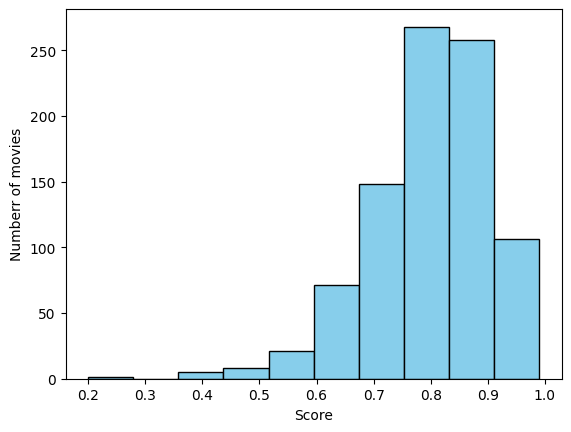

In [9]:
plt.hist(df['Score'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Numberr of movies')

Find unique values for Type column

In [10]:
df['Type'].unique()

array(['فیلم', 'سریال', 'انیمیشن'], dtype=object)

Showing the score range for each type of movie

([<matplotlib.axis.YTick at 0x128c6ea60>,
 [Text(0, 0, 'ﻢﻠﯿﻓ'), Text(0, 1, 'ﻝﺎﯾﺮﺳ'), Text(0, 2, 'ﻦﺸﯿﻤﯿﻧﺍ')])

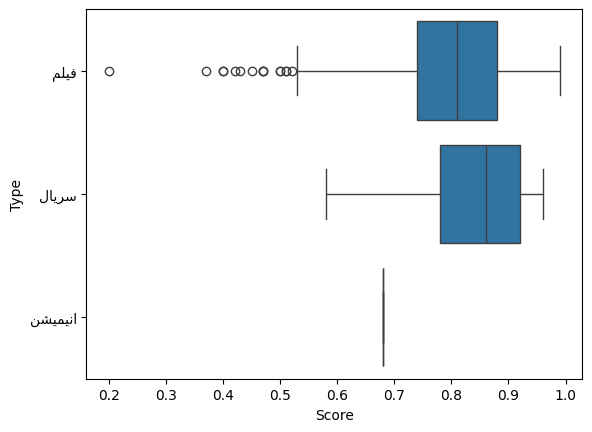

In [11]:
persian_labels = [get_display(reshape(label)) for label in df['Type'].unique()]
sns.boxplot(x='Score', y='Type', data=df)

# Adjust the y-axis labels to the reshaped Persian labels
plt.yticks(ticks=range(len(persian_labels)), labels=persian_labels)

In [12]:
df[df['Voted']==df['Voted'].max().item()]

,Name,Actors,Score,About,Genre,Crew,Voted,Type
868,دل,"[' لیلا زارع', ' بیژن امکانیان', ' نسرین مقانل...",0.78,سریال دل، داستانی ست عاشقانه و درام که روایتگر...,"['عاشقانه', 'خانوادگی']","[' منوچهر هادی', ' جواد فرحانی', ' سعید خندق آ...",1683837.0,سریال


In [13]:
df[df['Voted']==df['Voted'].min().item()]

,Name,Actors,Score,About,Genre,Crew,Voted,Type
320,صورت های تاریک,[],0.6,این نمایش در مورد شهادت حضرت زهرا (س) است که ا...,['فیلم تئاتر'],[],2.0,فیلم


ploting the proportion of movies based on their type

Text(0.5, 1.0, 'ﺍﻮﺘﺤﻣ ﻉﺍﻮﻧﺍ ﺖﺒﺴﻧ')

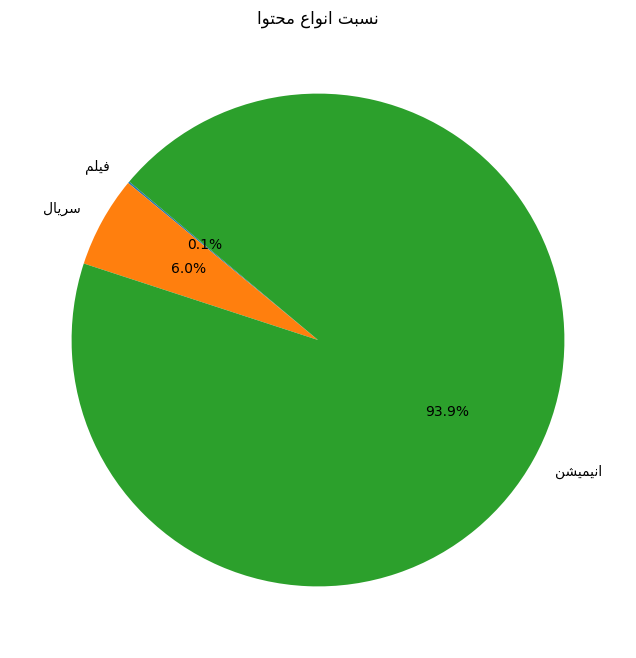

In [14]:
# Example data
proportions = [
    len(df[df['Type'] == 'انیمیشن']) / len(df),
    len(df[df['Type'] == 'سریال']) / len(df),
    len(df[df['Type'] == 'فیلم']) / len(df)
]

# Convert Persian labels to proper display format
labels = df['Type'].unique()  # Unique Persian labels
persian_labels = [get_display(reshape(label)) for label in labels]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=persian_labels, autopct='%1.1f%%', startangle=140)
plt.title(get_display(reshape('نسبت انواع محتوا')))

plotting the movie propotions based on their genre

/var/folders/vl/5b077ldn5_d2nc9jhcg6kmpm0000gn/T/ipykernel_16416/2821327911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=persian_labels, palette="viridis")


Text(0, 0.5, 'ﺮﻧﺍﮊ')

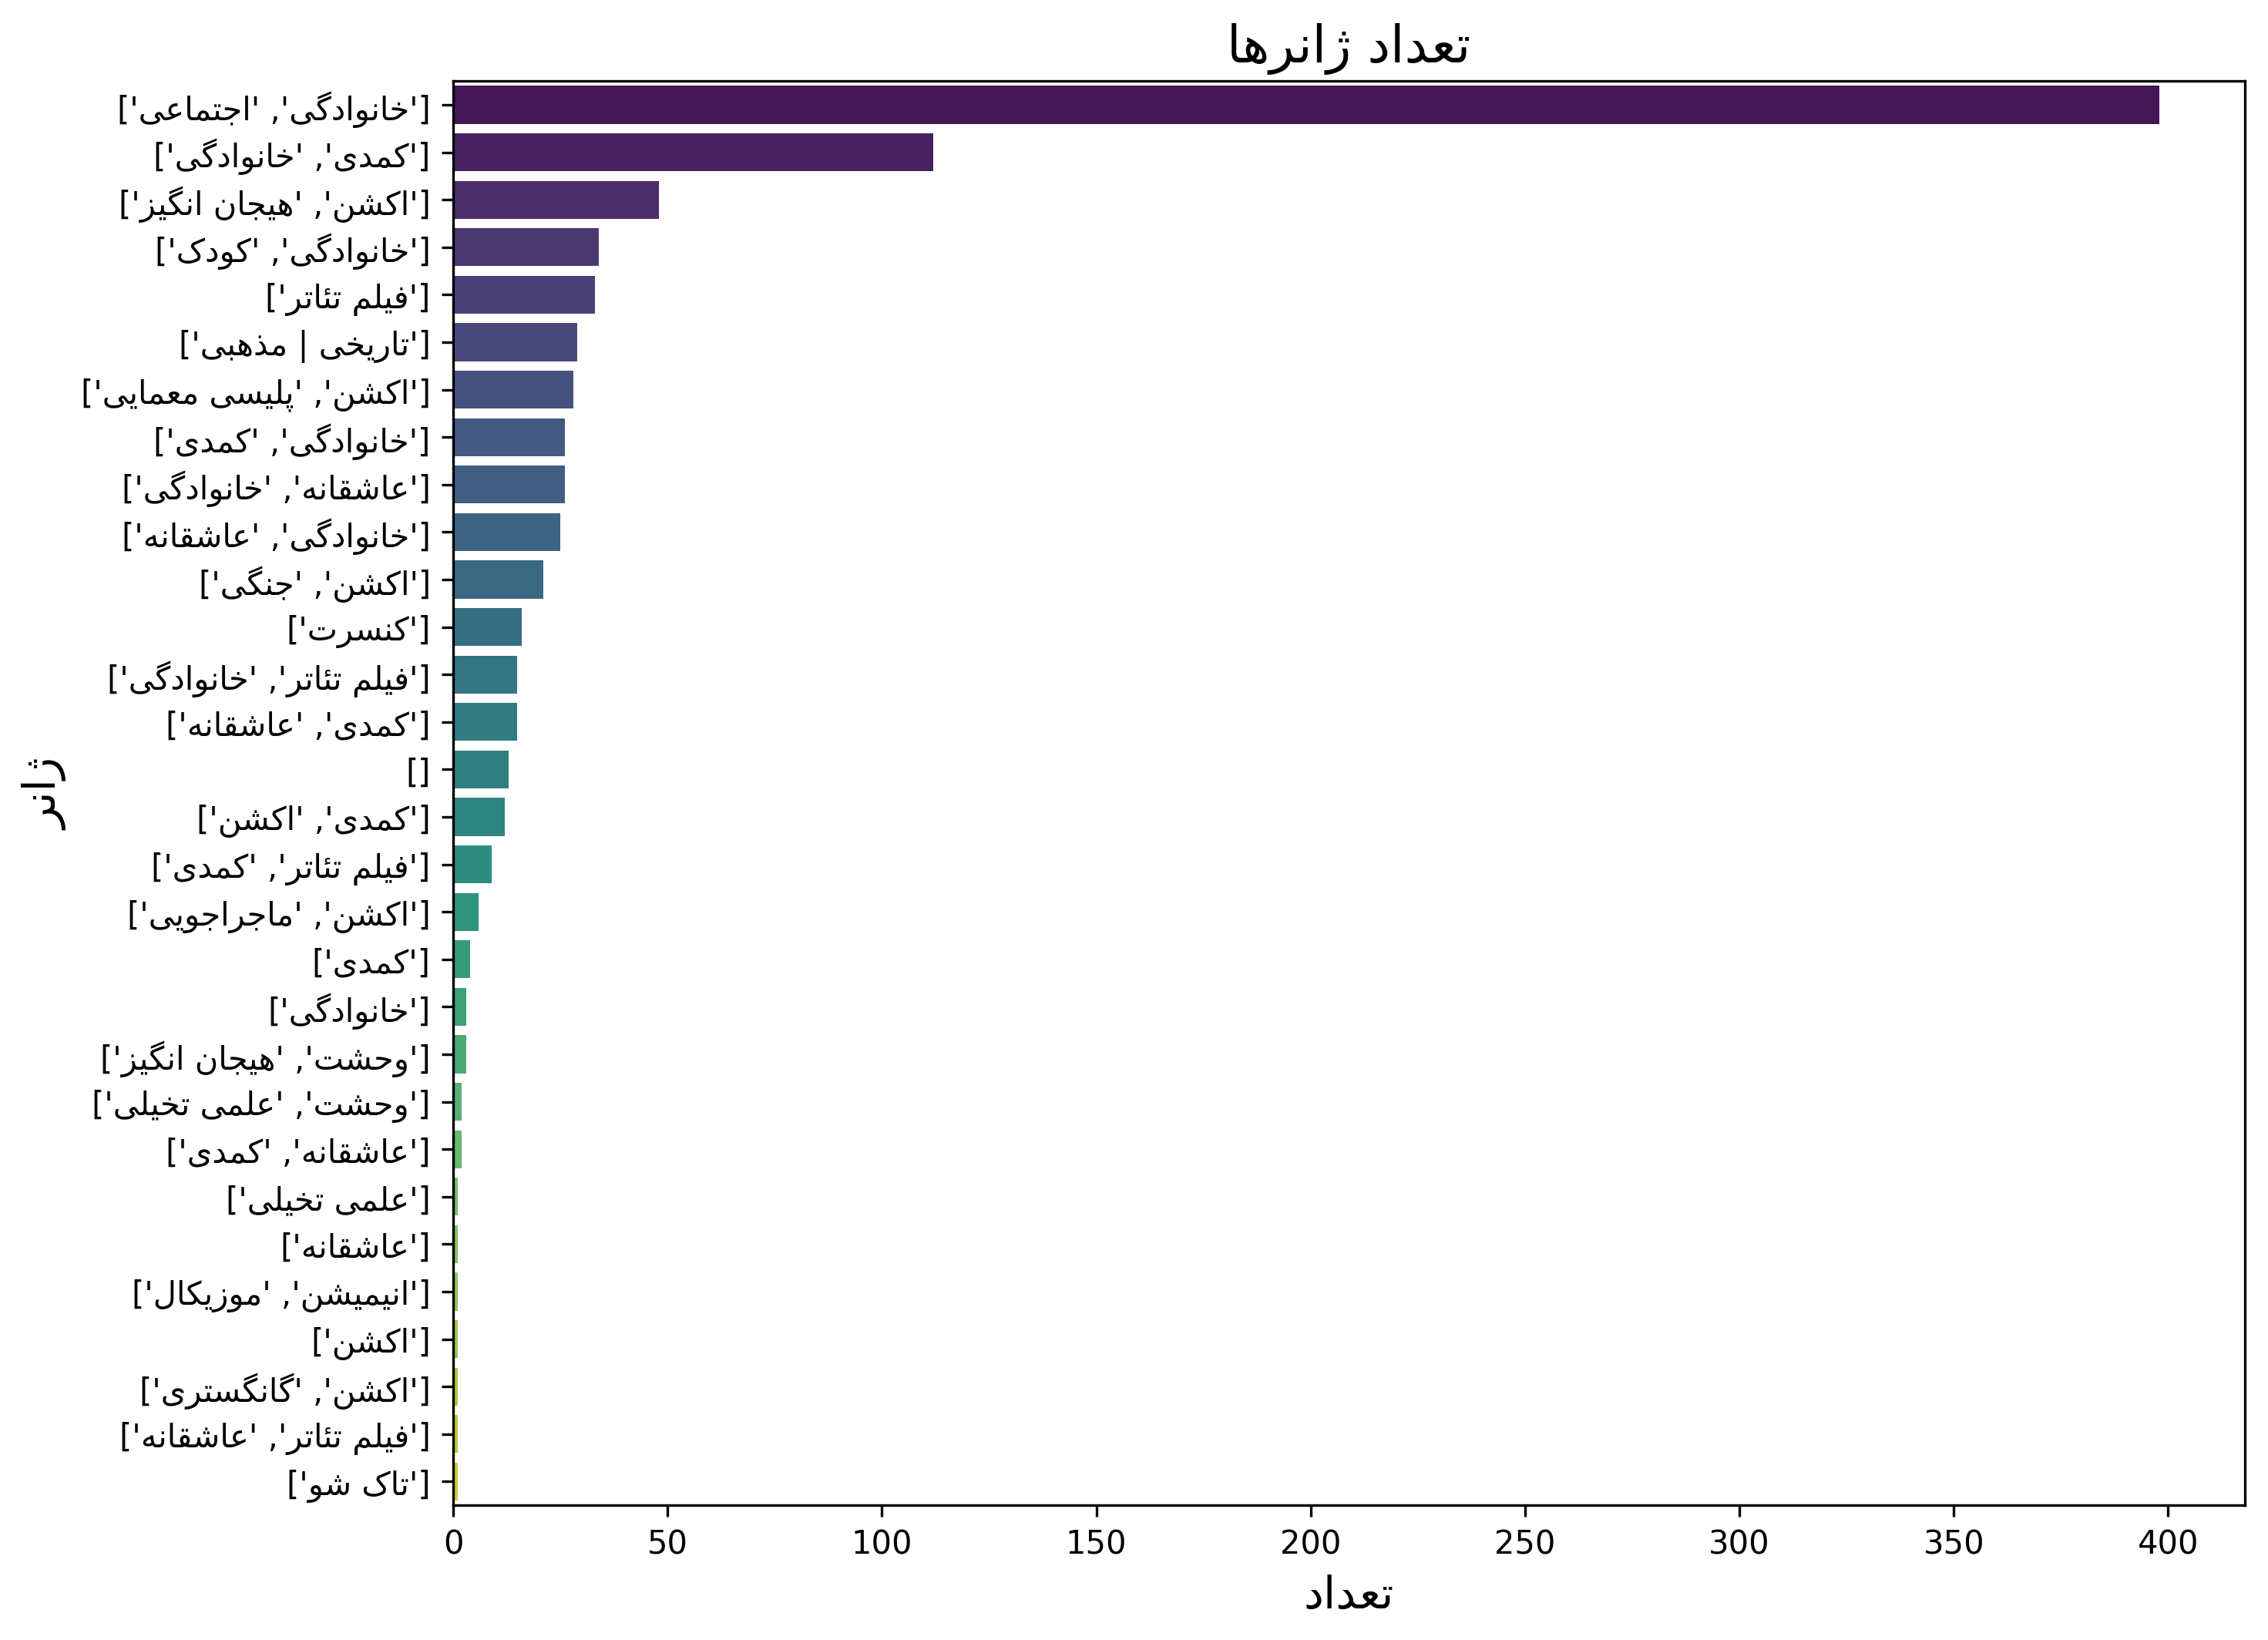

In [15]:
# Get genre counts
genre_counts = df['Genre'].value_counts()

# Reshape Persian labels
persian_labels = [get_display(reshape(label)) for label in genre_counts.index]

# Plot a bar chart
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x=genre_counts.values, y=persian_labels, palette="viridis")

# Customize the chart
plt.title(get_display(reshape('تعداد ژانرها')), fontsize=16)
plt.xlabel(get_display(reshape('تعداد')), fontsize=14)
plt.ylabel(get_display(reshape('ژانر')), fontsize=14)